In [ ]:
import requests #handling api calls
import pandas as pd # data manipulation
import concurrent.futures as futures # Handle api multithreading 
import datetime
import time

# Data Ack

** Note: Due to ram limitions though this was designed to be completed in a single loop, it is called indiviually**

In [ ]:
## Defining Functions

# ---- Handles the api request --- #
def camera_gather(values):
  # api call and retriving the object and putting it into a list
  call_url = 'https://api.data.gov.sg/v1/transport/traffic-images?date_time={value}'.format(value = values)
  responses = requests.get(call_url)
  json_responses = responses.json()
  return json_responses

  # --- Handles multiple calls to api and result formating --- #
def api_multi(datelist, response_array, x):
  # holds the array or responses from the api request workers
  future_holder = []
  # Looping at 150 - 200 request per second 
  with futures.ThreadPoolExecutor(max_workers = 200) as executor:
    # All times that are in the current date pool
    for times in datelist:
      resp = executor.submit(camera_gather, times)
      future_holder.append(resp)
    # Now looping through all the values in response
    for feature in futures.as_completed(future_holder):
      # Turning the responses into data frames and appending them to a larger array
      data_single = feature.result()
      try:
        new_df = pd.json_normalize(data_single['items'], 'cameras')
      except:
        pass
      response_array[x].append(new_df)
      


In [ ]:
# Setting up the holders for the responses
resp_2019 = []
resp_2020 = []
resp_2021 = []
api_response_holder = [resp_2019, resp_2020, resp_2021]
csv_names = ['resp_2019.csv', 'resp_2020.csv', 'resp_2021.csv']


In [ ]:
# Generating a dataframe with 1 mintue intervals for 2019/01/01
dates_2019 = pd.date_range(start = "2019-03-01", end = "2019-05-01", freq = '120S')
dates_2020 = pd.date_range(start = "2020-03-01", end = "2020-05-01", freq = '120S')
dates_2021 = pd.date_range(start = "2021-03-01", end = "2021-05-01", freq = '120S')


# pushing them all into a list
dateTime_list = [dates_2019, dates_2020, dates_2021]

# storing changed values
formated_2021 = []
formated_2020 = []
formated_2019 = []
date_list = [formated_2019, formated_2020 , formated_2021]


# for every date convert it into a fromat that the api call can recoginize for both months
for x in range (0,3):
  for dates in dateTime_list[x]:
    date_str = dates.strftime("%Y-%m-%dT%I:%M:%S")
    date_str = date_str.replace(':', '%3A')
    date_list[x].append(date_str)
  print(len(date_list[x]))

43921
43921
43921


Each API call takes about 30 minutes and need to be done individually
****
2019
****

In [ ]:
# call for time range in 2019
api_multi(date_list[0], api_response_holder, 0)


In [ ]:
# converting all response into a single df
df_2019 = pd.concat(api_response_holder[0], ignore_index=True)

!cp resp_2019.csv "/content/drive/MyDrive/Colab Notebooks/ComputerVision/"
# Picking out select cameras to make  load times better when importing 
c_id1702 =( df_2019[df_2019['camera_id'] == '1702'])
c_id1702 = c_id1702.sort_values(by='timestamp')
c_id1702  = c_id1702.drop_duplicates('image')
c_id1702.to_csv('resp_2019_c_id1702.csv')
!cp resp_2019_c_id1702.csv "/content/drive/MyDrive/Colab Notebooks/ComputerVision/"

c_id1711 =( df_2019[df_2019['camera_id'] == '1711'])
c_id1711= c_id1711.sort_values(by='timestamp')
c_id1711 = c_id1711.drop_duplicates('image')
c_id1711.to_csv('resp_2019_c_id1711.csv')
!cp resp_2019_c_id1711.csv "/content/drive/MyDrive/Colab Notebooks/ComputerVision/"

c_id2705 =( df_2019[df_2019['camera_id'] == '2705'])
c_id2705 = c_id2705.sort_values(by='timestamp')
c_id2705  = c_id2705.drop_duplicates('image')
c_id2705.to_csv('resp_2019_c_id2705.csv')
!cp resp_2019_c_id2705.csv "/content/drive/MyDrive/Colab Notebooks/ComputerVision/"

c_id2707 =( df_2019[df_2019['camera_id'] == '2707'])
c_id2707 = c_id2707.sort_values(by='timestamp')
c_id1707 = c_id2707.drop_duplicates('image')
c_id2707.to_csv('resp_2019_c_id2707.csv')
!cp resp_2019_c_id2707.csv "/content/drive/MyDrive/Colab Notebooks/ComputerVision/"

***** 
2020
*****

In [ ]:
# call for time range in 2020
api_multi(date_list[1], api_response_holder, 1)

In [ ]:
df_2020 = pd.concat(api_response_holder[1], ignore_index=True)
#df_2020 = df_2020.sort_values(by='timestamp')

In [ ]:
df_2020.to_csv('resp_2020.csv')
!cp resp_2020.csv "/content/drive/MyDrive/Colab Notebooks/ComputerVision/"
# Picking out select cameras to make  load times better when importing 
c_id1702 =( df_2020[df_2020['camera_id'] == '1702'])
c_id1702 = c_id1702.sort_values(by='timestamp')
c_id1702  = c_id1702.drop_duplicates('image')
c_id1702.to_csv('resp_2020_c_id1702.csv')
!cp resp_2020_c_id1702.csv "/content/drive/MyDrive/Colab Notebooks/ComputerVision/"

c_id1711 =( df_2020[df_2020['camera_id'] == '1711'])
c_id1711= c_id1711.sort_values(by='timestamp')
c_id1711 = c_id1711.drop_duplicates('image')
c_id1711.to_csv('resp_2020_c_id1711.csv')
!cp resp_2020_c_id1711.csv "/content/drive/MyDrive/Colab Notebooks/ComputerVision/"

c_id2705 =( df_2020[df_2020['camera_id'] == '2705'])
c_id2705 = c_id2705.sort_values(by='timestamp')
c_id2705  = c_id2705.drop_duplicates('image')
c_id2705.to_csv('resp_2020_c_id2705.csv')
!cp resp_2020_c_id2705.csv "/content/drive/MyDrive/Colab Notebooks/ComputerVision/"

c_id2707 =( df_2020[df_2020['camera_id'] == '2707'])
c_id2707 = c_id2707.sort_values(by='timestamp')
c_id1707 = c_id2707.drop_duplicates('image')
c_id2707.to_csv('resp_2020_c_id2707.csv')
!cp resp_2020_c_id2707.csv "/content/drive/MyDrive/Colab Notebooks/ComputerVision/"

******
2021
******

In [ ]:
# call for time range in 2021
api_multi(date_list[2], api_response_holder, 2)
df_2020 = pd.concat(api_response_holder[2], ignore_index=True)

In [ ]:
df_2021 = df_2020
df_2021.to_csv('resp_2021.csv')
!cp resp_2021.csv "/content/drive/MyDrive/Colab Notebooks/ComputerVision/"
# Picking out select cameras to make  load times better when importing 
c_id1702 =( df_2021[df_2021['camera_id'] == '1702'])
c_id1702 = c_id1702.sort_values(by='timestamp')
c_id1702  = c_id1702.drop_duplicates('image')
c_id1702.to_csv('resp_2021_c_id1702.csv')
!cp resp_2021_c_id1702.csv "/content/drive/MyDrive/Colab Notebooks/ComputerVision/"

c_id1711 =( df_2021[df_2021['camera_id'] == '1711'])
c_id1711= c_id1711.sort_values(by='timestamp')
c_id1711 = c_id1711.drop_duplicates('image')
c_id1711.to_csv('resp_2021_c_id1711.csv')
!cp resp_2021_c_id1711.csv "/content/drive/MyDrive/Colab Notebooks/ComputerVision/"

c_id2705 =( df_2021[df_2021['camera_id'] == '2705'])
c_id2705 = c_id2705.sort_values(by='timestamp')
c_id2705  = c_id2705.drop_duplicates('image')
c_id2705.to_csv('resp_2021_c_id2705.csv')
!cp resp_2021_c_id2705.csv "/content/drive/MyDrive/Colab Notebooks/ComputerVision/"

c_id2707 =( df_2021[df_2021['camera_id'] == '2707'])
c_id2707 = c_id2707.sort_values(by='timestamp')
c_id1707 = c_id2707.drop_duplicates('image')
c_id2707.to_csv('resp_2021_c_id2707.csv')
!cp resp_2021_c_id2707.csv "/content/drive/MyDrive/Colab Notebooks/ComputerVision/"



---



# Image Bulk Download!



---





In [ ]:
# defining a method for getting images from the CSV locations
def ImageGetter(url, camera, year, index):
 # takes in url, an 
  try:
    response = requests.get(url)
    if response.ok:
      with open('/content/drive/MyDrive/Colab Notebooks/ComputerVision/road_images_{year}_{camera}/{camera}_{it}.jpg'.format(camera=camera, it=index, year=year), 'wb') as out_file:
       out_file.write(response.content)
       del response
  except:
    print('{} has failed to grab an image at: {url}'.format(it,url))


In [ ]:
# this helps for rec
it = 0

# Loading in the csv as a dataFrame 

# --- Camera 1702 --- #
df_id1702_2019 =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ComputerVision/resp_2019_c_id1702.csv')
df_id1702_2019 = df_id1702_2019.drop("Unnamed: 0", axis=1)
df_id1702_2020 =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ComputerVision/resp_2020_c_id1702.csv')
df_id1702_2020 = df_id1702_2020.drop("Unnamed: 0", axis=1)
df_id1702_2021 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ComputerVision/resp_2021_c_id1702.csv')
df_id1702_2021 = df_id1702_2021.drop("Unnamed: 0", axis=1)

# --- Image store --- #
c1702 = [df_id1702_2019, df_id1702_2020, df_id1702_2021]

# --- Camera 1702 --- #
df_id1711_2019 =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ComputerVision/resp_2019_c_id1711.csv')
df_id1711_2020 =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ComputerVision/resp_2020_c_id1711.csv')
df_id1711_2021 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ComputerVision/resp_2021_c_id1711.csv')

print(df_id1702_2019.columns)

Index(['timestamp', 'image', 'camera_id', 'location.latitude',
       'location.longitude', 'image_metadata.height', 'image_metadata.width',
       'image_metadata.md5'],
      dtype='object')


In [ ]:
def api_imageRequest(cameraDF, year):
  # Using workers it calls the api 150 async to do a large amount of request in a shorter timespan
  with futures.ThreadPoolExecutor(max_workers = 150) as executor:
      for index, row in cameraDF.iterrows():
        executor.submit(ImageGetter, row['image'], row['camera_id'], year, index)


In [ ]:
# Camera 1702 and 1711 Image Download 
api_imageRequest(df_id1702_2019, 2019)
api_imageRequest(df_id1702_2020, 2020)
api_imageRequest(df_id1702_2021, 2021)
api_imageRequest(df_id1711_2019, 2019)
api_imageRequest(df_id1711_2020, 2020)
api_imageRequest(df_id1711_2021, 2021)


---
# Image Analysis
---

In [2]:
# setting up working directory
import os
os.chdir( '/content/drive/MyDrive/Colab Notebooks/ComputerVision')
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/ComputerVision'

In [3]:
#installing necessary libraries
!pip install cvlib
!pip install progress
# importing them libs
import cvlib as cv
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from cvlib.object_detection import draw_bbox
from progress.bar import Bar

     |████████████████████████████████| 10.0 MB 7.2 MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.6-py3-none-any.whl size=10044620 sha256=b6aa3c59c5bfe749da8fe40a52c4fd67dbacd43d646823a9d7f718acc0ba7e68
  Stored in directory: /root/.cache/pip/wheels/9b/96/9b/373c07517ffe0bedbebc0813aec1e62cb2bb1dee91b3694895
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=4299a02de1de74e51c53d076249af8642d4e2ffc089ba0ba36999cfc513c269d
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built cvlib progressbar
  Created wheel for progress: filename=progress-1.6-py3-none-any.whl size=9630 sha256=69c301135009f8be52cd699f6dceac22e2e4bd0edf4d9ca050b142740a81780a
  Stored in directory: /root/.cache/pip/wheels/8e/d7/61/498d8e27dc11e9805b01eb3539e2ee344436fc226daeb5fe87
Successfully built progress



***
Camera 1702 -- near city center
*** 

Reading in the datafiles and droping the artifact column from processing


In [4]:
df_id1702_2019 =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ComputerVision/resp_2019_c_id1702.csv')
df_id1702_2019 = df_id1702_2019.drop("Unnamed: 0", axis=1)
df_id1702_2020 =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ComputerVision/resp_2020_c_id1702.csv')
df_id1702_2020 = df_id1702_2020.drop("Unnamed: 0", axis=1)
df_id1702_2021 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ComputerVision/resp_2021_c_id1702.csv')
df_id1702_2021 = df_id1702_2021.drop("Unnamed: 0", axis=1)

In [8]:
df_id1711_2019 =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ComputerVision/resp_2019_c_id1711.csv')
df_id1711_2019 = df_id1711_2019.drop("Unnamed: 0", axis=1)
df_id1711_2020 =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ComputerVision/resp_2020_c_id1711.csv')
df_id1711_2020 = df_id1711_2020.drop("Unnamed: 0", axis=1)
df_id1711_2021 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ComputerVision/resp_2021_c_id1711.csv')
df_id1711_2021 = df_id1711_2021.drop("Unnamed: 0", axis=1)

(-0.5, 639.5, 479.5, -0.5)

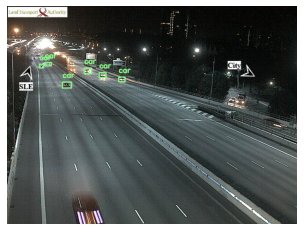

In [ ]:
# reading in a single image from the image folder
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/ComputerVision/road_images_2019_1702/1702_1.jpg')
locations, label, cf = cv.detect_common_objects(image=image, model='yolov4', enable_gpu=True )
# print(len(label)) # 6 cars appear in this
new_image = draw_bbox(image, locations, label, cf);
plt.imshow(new_image)
plt.axis('off')

# Function to get all labels for a folder

In [5]:
def getLabelCount(index, folderPath, cameraID, results):
    try:           
            imgPath = folderPath + '/' + cameraID + '_' + '{index}'.format(index=index) + ".jpg"
            image = cv2.imread(imgPath)
            locations, labels, cf = cv.detect_common_objects(image=image, model='yolov4', enable_gpu=True )
            num_cars = len(labels)
            results.append(num_cars)
    except:
        print("for " + '{index}'.format(index=index) + " calculations did not work")
        results.append("N/A")

These are seperated out because each cell takes 4 hours and I don't want to be in the middle of data ack and google drop the connection

***
# 2019 Camera 1702 
***

In [ ]:
results = []

for index, row in df_id1702_2019.iterrows():
        getLabelCount(index,"/content/drive/MyDrive/Colab Notebooks/ComputerVision/road_images_2019_1702", '1702',results)

df_id1702_2019_labels = pd.DataFrame(results)
df_id1702_2019_labels.to_csv('resp_2019_c_id1702_labels.csv')
!cp resp_2019_c_id1702_labels.csv "/content/drive/MyDrive/Colab Notebooks/ComputerVision/"

cp: 'resp_2019_c_id1702_labels.csv' and '/content/drive/MyDrive/Colab Notebooks/ComputerVision/resp_2019_c_id1702_labels.csv' are the same file


In [ ]:
df_id1702_2019_labels = pd.DataFrame(results)
df_id1702_2019_labels

,0
0,4
1,6
2,4
3,7
4,5
...,...
20715,18
20716,14
20717,17
20718,20


*** 
# 2020 Camera 1702 
***

In [ ]:
results = []

for index,row in df_id1702_2020.iterrows():
        getLabelCount(index,"/content/drive/MyDrive/Colab Notebooks/ComputerVision/road_images_2020_1702", '1702',results)

df_id1702_2020_labels = pd.DataFrame(results)
df_id1702_2020_labels.to_csv('resp_2020_c_id1702_labels.csv')
!cp resp_2020_c_id1702_labels.csv "/content/drive/MyDrive/Colab Notebooks/ComputerVision/"

for 3176 calculations did not work
for 10035 calculations did not work
for 10654 calculations did not work
for 12125 calculations did not work
for 12281 calculations did not work
for 12307 calculations did not work
for 12830 calculations did not work
for 14065 calculations did not work
for 18996 calculations did not work
for 19324 calculations did not work
for 19845 calculations did not work
for 19860 calculations did not work
for 20098 calculations did not work
for 20099 calculations did not work
for 20100 calculations did not work
cp: 'resp_2020_c_id1702_labels.csv' and '/content/drive/MyDrive/Colab Notebooks/ComputerVision/resp_2020_c_id1702_labels.csv' are the same file


*** 
# 2021 Camera 1702 
***

In [6]:
results = []

for index,row in df_id1702_2021.iterrows():
        getLabelCount(index,"/content/drive/MyDrive/Colab Notebooks/ComputerVision/road_images_2021_1702", '1702',results)

df_id1702_2021_labels = pd.DataFrame(results)
df_id1702_2021_labels.to_csv('resp_2021_c_id1702_labels.csv')
!cp resp_2021_c_id1702_labels.csv "/content/drive/MyDrive/Colab Notebooks/ComputerVision/"

cp: 'resp_2021_c_id1702_labels.csv' and '/content/drive/MyDrive/Colab Notebooks/ComputerVision/resp_2021_c_id1702_labels.csv' are the same file


In [9]:
results = []

for index, row in df_id1711_2019.iterrows():
        getLabelCount(index,"/content/drive/MyDrive/Colab Notebooks/ComputerVision/road_images_2019_1711", '1711',results)

df_id1711_2019_labels = pd.DataFrame(results)
df_id1711_2019_labels.to_csv('resp_2019_c_id1711_labels.csv')
!cp resp_2019_c_id1711_labels.csv "/content/drive/MyDrive/Colab Notebooks/ComputerVision/"

cp: 'resp_2019_c_id1711_labels.csv' and '/content/drive/MyDrive/Colab Notebooks/ComputerVision/resp_2019_c_id1711_labels.csv' are the same file


In [10]:
results = []

for index, row in df_id1711_2020.iterrows():
        getLabelCount(index,"/content/drive/MyDrive/Colab Notebooks/ComputerVision/road_images_2020_1711", '1711',results)

df_id1711_2020_labels = pd.DataFrame(results)
df_id1711_2020_labels.to_csv('resp_2020_c_id1711_labels.csv')
!cp resp_2020_c_id1711_labels.csv "/content/drive/MyDrive/Colab Notebooks/ComputerVision/"

cp: 'resp_2020_c_id1711_labels.csv' and '/content/drive/MyDrive/Colab Notebooks/ComputerVision/resp_2020_c_id1711_labels.csv' are the same file
